<a href="https://colab.research.google.com/github/mateusbissani/prouniRSDataScienceUP/blob/main/TrabalhoDataScience_1bi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sheet_url = "/content/drive/MyDrive/Trabalho-DS/prouni-RS.csv"
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(url)

In [ ]:
df.head ()

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,RS,Alegrete,Universidade da Região da Campanha - URCAMP,CAMPUS UNIVERSITÁRIO DE ALEGRETE - CENTRO,Administração,Bacharelado,Noturno,1205.85,0.0,1.0,NaN,NaN,623.94,NaN,NaN,NaN
1,RS,Alvorada,Universidade Paulista - UNIP,ALVORADA - Centro,Administração,Bacharelado,Curso a Distância,299.00,0.0,1.0,NaN,NaN,596.64,NaN,NaN,NaN
2,RS,Arroio dos Ratos,Centro Universitário Cenecista de Osório - Uni...,POLO - ARROIO DOS RATOS - Centro,Administração,Bacharelado,Curso a Distância,333.00,0.0,1.0,NaN,NaN,549.60,NaN,NaN,NaN
3,RS,Arroio do Tigre,Centro Universitário Internacional - Uninter -...,PAP ARROIO DO TIGRE - Centro,Administração,Bacharelado,Curso a Distância,298.00,NaN,NaN,NaN,1.0,NaN,NaN,587.02,NaN
4,RS,Arroio Grande,Centro Universitário da Grande Dourados - Unig...,ARROIO GRANDE - centro,Administração,Bacharelado,Curso a Distância,250.00,1.0,3.0,1.0,5.0,492.44,450.0,450.00,450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uf_busca              3060 non-null   object 
 1   cidade_busca          3060 non-null   object 
 2   universidade_nome     3060 non-null   object 
 3   campus_nome           3060 non-null   object 
 4   nome                  3060 non-null   object 
 5   grau                  3060 non-null   object 
 6   turno                 3060 non-null   object 
 7   mensalidade           3060 non-null   float64
 8   bolsa_integral_cotas  2448 non-null   float64
 9   bolsa_integral_ampla  2448 non-null   float64
 10  bolsa_parcial_cotas   94 non-null     float64
 11  bolsa_parcial_ampla   1012 non-null   float64
 12  nota_integral_ampla   2448 non-null   float64
 13  nota_integral_cotas   573 non-null    float64
 14  nota_parcial_ampla    1012 non-null   float64
 15  nota_parcial_cotas   

In [ ]:
df[df.isna().any(axis=1)]

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,RS,Alegrete,Universidade da Região da Campanha - URCAMP,CAMPUS UNIVERSITÁRIO DE ALEGRETE - CENTRO,Administração,Bacharelado,Noturno,1205.85,0.0,1.0,NaN,NaN,623.94,NaN,NaN,NaN
1,RS,Alvorada,Universidade Paulista - UNIP,ALVORADA - Centro,Administração,Bacharelado,Curso a Distância,299.00,0.0,1.0,NaN,NaN,596.64,NaN,NaN,NaN
2,RS,Arroio dos Ratos,Centro Universitário Cenecista de Osório - Uni...,POLO - ARROIO DOS RATOS - Centro,Administração,Bacharelado,Curso a Distância,333.00,0.0,1.0,NaN,NaN,549.60,NaN,NaN,NaN
3,RS,Arroio do Tigre,Centro Universitário Internacional - Uninter -...,PAP ARROIO DO TIGRE - Centro,Administração,Bacharelado,Curso a Distância,298.00,NaN,NaN,NaN,1.0,NaN,NaN,587.02,NaN
5,RS,Bage,Centro Universitário Internacional - Uninter -...,PAP BAGÉ - Centro,Administração,Bacharelado,Curso a Distância,298.00,0.0,3.0,NaN,2.0,549.08,NaN,595.46,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,RS,Viamao,Centro Universitário Internacional - Uninter -...,PAP VIAMÃO - Centro,Teologia,Bacharelado,Curso a Distância,189.00,NaN,NaN,NaN,1.0,NaN,NaN,465.72,NaN
3056,RS,Santa Maria,Centro Universitário Franciscano - Unifra - UN...,CONJUNTO III - Nossa Senhora do Rosário,Terapia Ocupacional,Bacharelado,Noturno,1325.08,0.0,4.0,NaN,NaN,608.48,NaN,NaN,NaN
3057,RS,Caxias do Sul,Universidade de Caxias do Sul - UCS,CAMPUS SEDE - Petrópolis,Turismo,Bacharelado,Noturno,1123.60,0.0,2.0,NaN,NaN,587.12,NaN,NaN,NaN
3058,RS,Novo Hamburgo,Universidade Feevale - FEEVALE,SEDE - VILA NOVA,Turismo,Bacharelado,Noturno,821.45,1.0,3.0,NaN,NaN,601.72,588.56,NaN,NaN


# Vamos aplicar o fillna para substituir os valors nulos para zero

In [ ]:
df[['bolsa_integral_cotas', 'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla','nota_integral_ampla', 'nota_integral_cotas',  'nota_parcial_ampla', 'nota_parcial_cotas'  ]] =df[['bolsa_integral_cotas', 'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla','nota_integral_ampla', 'nota_integral_cotas',  'nota_parcial_ampla', 'nota_parcial_cotas']].fillna(0)

df[df.isna().any(axis=1)]

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas


# Info( ) para ver se os valores nulos foram substituidos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uf_busca              3060 non-null   object 
 1   cidade_busca          3060 non-null   object 
 2   universidade_nome     3060 non-null   object 
 3   campus_nome           3060 non-null   object 
 4   nome                  3060 non-null   object 
 5   grau                  3060 non-null   object 
 6   turno                 3060 non-null   object 
 7   mensalidade           3060 non-null   float64
 8   bolsa_integral_cotas  3060 non-null   float64
 9   bolsa_integral_ampla  3060 non-null   float64
 10  bolsa_parcial_cotas   3060 non-null   float64
 11  bolsa_parcial_ampla   3060 non-null   float64
 12  nota_integral_ampla   3060 non-null   float64
 13  nota_integral_cotas   3060 non-null   float64
 14  nota_parcial_ampla    3060 non-null   float64
 15  nota_parcial_cotas   

# Rename para renomear a coluna cidade_busca para cidade

In [ ]:
df = df.rename(columns={'cidade_busca': 'cidade'})


# Vamos começar a construir nosso histograma

In [ ]:
bins = np.histogram_bin_edges(df.mensalidade, bins='sturges')
bins

array([ 149.        ,  778.30384615, 1407.60769231, 2036.91153846,
       2666.21538462, 3295.51923077, 3924.82307692, 4554.12692308,
       5183.43076923, 5812.73461538, 6442.03846154, 7071.34230769,
       7700.64615385, 8329.95      ])

In [ ]:
len(bins)

14

Aqui veremos a distribuição do valor da mensalidade dos cursos ofericidos

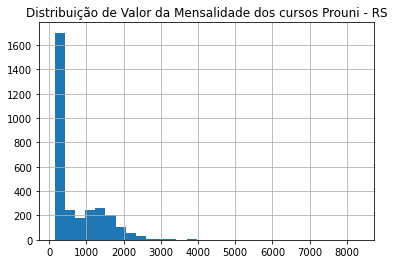

In [ ]:
df.mensalidade.hist(bins=30)
plt.title('Distribuição de Valor da Mensalidade dos cursos Prouni - RS')
plt.show()

# px.histogram para criar um grafico com a relaçao de grau do curso com o turno

In [ ]:
import plotly.express as px
grafico =  px.histogram (df,  x = "grau", nbins=3, color='turno') 
grafico.update_layout(width=500,height=400,title_text='Turno de cursos por grau de graduação', title_font_color = 'black') 

grafico.show()

# sns.histplot para a visualização agora com a relação de bolsa integral ampla por gray

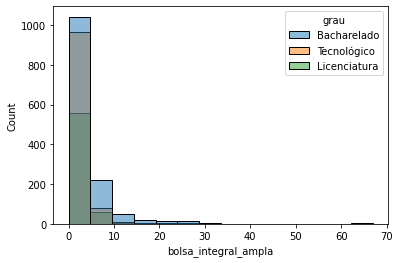

In [ ]:
sns.histplot(df, x="bolsa_integral_ampla", hue="grau", bins=len(bins))

# sns.boxplot para identificar outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



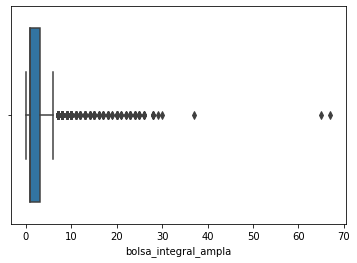

In [ ]:
sns.boxplot(df['bolsa_integral_ampla'])

identificamos valores acima de 10 podem ser considerados outliers

In [ ]:
df['bolsa_integral_ampla'].unique()

array([ 1.,  0.,  3.,  6.,  4., 14.,  2., 10., 67., 12., 13.,  9.,  8.,
        5., 28., 29., 18., 65.,  7., 25., 11., 26., 15., 21., 17., 22.,
       23., 20., 24., 37., 16., 19., 30.])

In [ ]:
print(np.where(df['bolsa_integral_ampla'] > 30))

(array([ 27, 145, 837]),)


# Vamos utilizar sns.pairplot para gerar os graficos de relaçoes com o campo grau

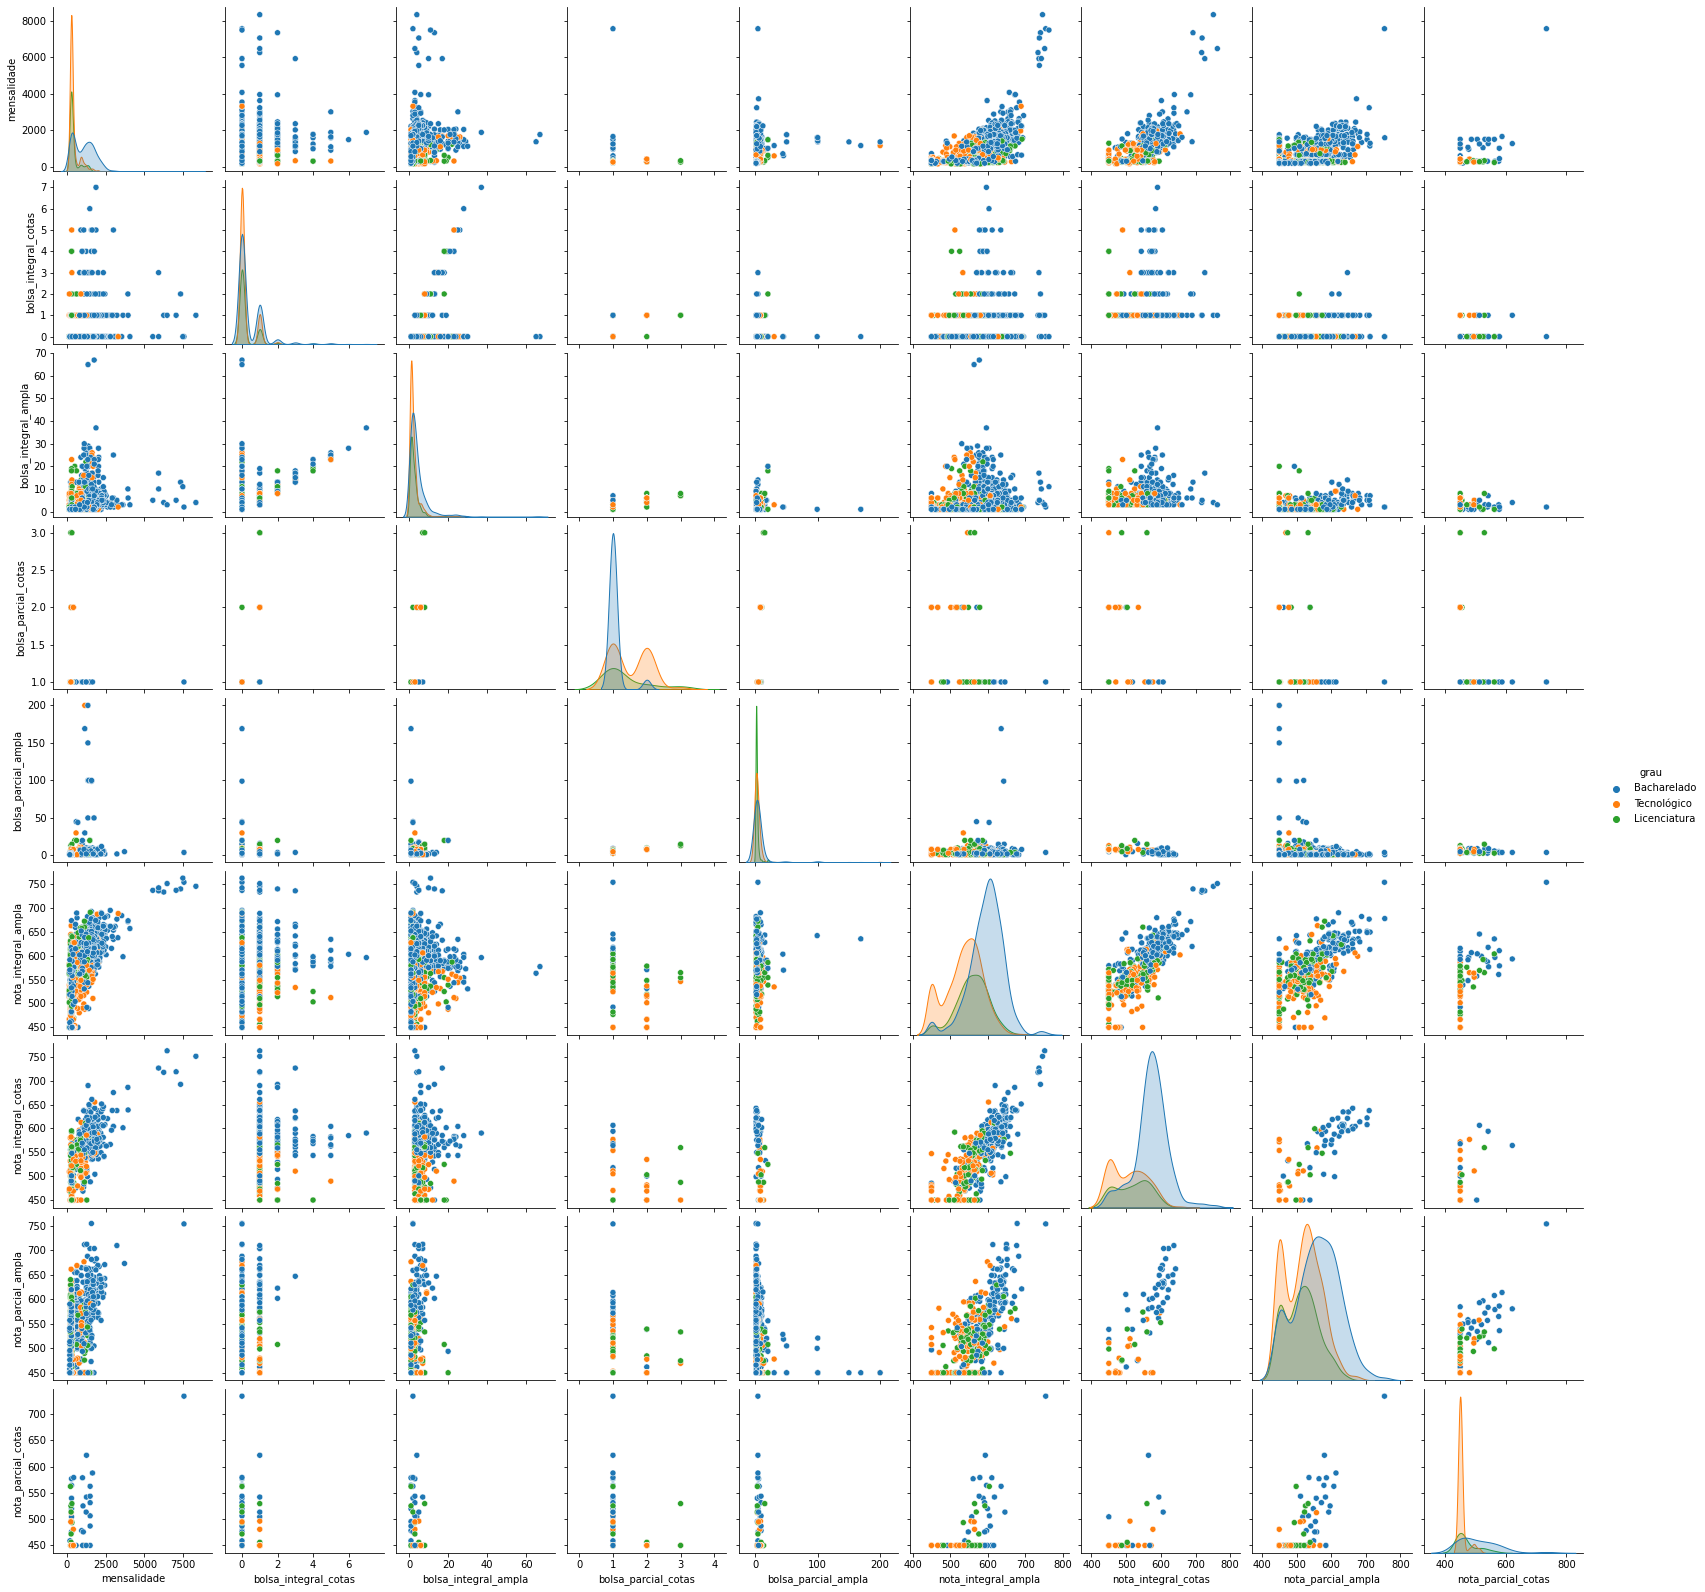

In [ ]:
sns.pairplot(data=df, hue='grau', corner=False)

## Vamos usar o corr() para identificar correlações


In [ ]:
df.corr()

,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
mensalidade,1.000000,0.239803,0.356030,-0.050222,0.054759,0.310148,0.287979,-0.132983,-0.026876
bolsa_integral_cotas,0.239803,1.000000,0.546096,0.105828,-0.025051,0.221354,0.834378,-0.167414,0.073367
bolsa_integral_ampla,0.356030,0.546096,1.000000,0.052872,-0.041012,0.345079,0.397061,-0.262148,0.026428
bolsa_parcial_cotas,-0.050222,0.105828,0.052872,1.000000,0.114554,0.043860,0.142754,0.206138,0.909935
bolsa_parcial_ampla,0.054759,-0.025051,-0.041012,0.114554,1.000000,-0.123896,-0.025628,0.212882,0.105399
nota_integral_ampla,0.310148,0.221354,0.345079,0.043860,-0.123896,1.000000,0.268632,-0.678081,0.052560
nota_integral_cotas,0.287979,0.834378,0.397061,0.142754,-0.025628,0.268632,1.000000,-0.179998,0.104180
nota_parcial_ampla,-0.132983,-0.167414,-0.262148,0.206138,0.212882,-0.678081,-0.179998,1.000000,0.230566
nota_parcial_cotas,-0.026876,0.073367,0.026428,0.909935,0.105399,0.052560,0.104180,0.230566,1.000000


In [ ]:
corr = df.corr()

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

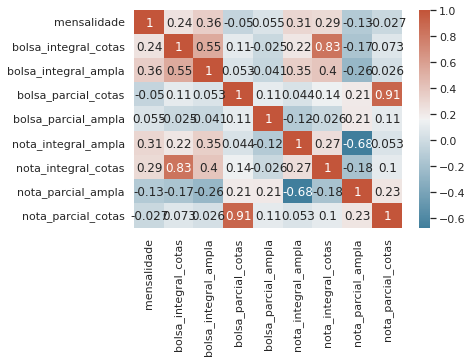

In [ ]:
sns.heatmap(df.corr(),cmap=cmap, annot=True);

# Notamos que existe um correlaçao forte entre nota parcial cotas e bolsa parcial cotas, o mesmo acontece com nota parcial ampla e bolsa parcial ampla

# Vamos ver essas relações no grafico de *dispersão*

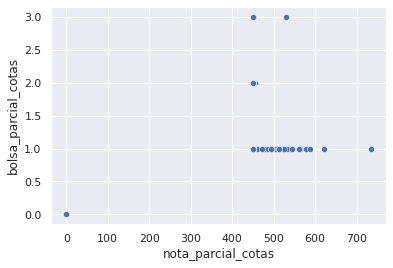

In [ ]:
sns.scatterplot(data=df, x=df['nota_parcial_cotas'], y=df['bolsa_parcial_cotas'])

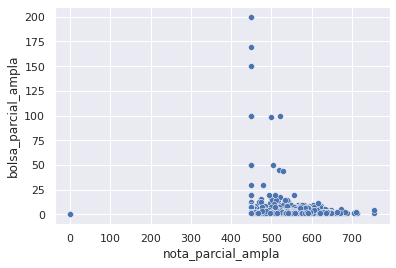

In [ ]:
sns.scatterplot(data=df, x=df['nota_parcial_ampla'], y=df['bolsa_parcial_ampla'])

# Vamos tirar a media, mediana e moda de 5 colunas: mensalidade, nota int ampla, nota integral cotas, bolsa integral ampla e bolsa integral cotas

### Media

In [ ]:
df['mensalidade'].mean().round(2)

743.0

In [ ]:
df['nota_integral_ampla'].mean().round(2)

567.42

In [ ]:
df['nota_integral_cotas'].mean().round(2)

547.66

In [ ]:
df['bolsa_integral_ampla'].mean().round(2)

3.35

In [ ]:
df['bolsa_integral_cotas'].mean().round(2)

0.29

### Mediana

In [ ]:
df['mensalidade'].median().round(2)

333.0

In [ ]:
df['nota_integral_ampla'].median().round(2)

571.62

In [ ]:
df['nota_integral_cotas'].median().round(2)

558.28

In [ ]:
df['bolsa_integral_ampla'].median().round(2)

2.0

In [ ]:
df['bolsa_integral_cotas'].median().round(2)

0.0

### Moda


In [ ]:
df['mensalidade'].mode()

0    333.0
dtype: float64

In [ ]:
df['nota_integral_ampla'].mode()

0    450.0
dtype: float64

In [ ]:
df['nota_integral_cotas'].mode()

0    450.0
dtype: float64

In [ ]:
df['bolsa_integral_ampla'].mode()

0    1.0
dtype: float64

In [ ]:
df['bolsa_integral_cotas'].mode()

0    0.0
dtype: float64

# Agora iremos trabalhar com outra medida de dispersão, o Desvio Padrão, neste caso, utilizaremos o método - df.describe() -

#### Desvio Padrão da coluna Nota Integral Ampla

In [ ]:
df['nota_integral_ampla'].describe()

count    2448.000000
mean      567.415515
std        53.771581
min       450.000000
25%       535.940000
50%       571.620000
75%       604.840000
max       762.580000
Name: nota_integral_ampla, dtype: float64

####Desvio Padrão para todas as colunas

In [ ]:
df.describe()

,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
count,3060.000000,2448.000000,2448.000000,94.000000,1012.000000,2448.000000,573.000000,1012.000000,94.000000
mean,743.003467,0.290441,3.352941,1.319149,4.061265,567.415515,547.656824,534.399328,478.066170
std,706.158091,0.635580,4.341523,0.533053,13.805567,53.771581,57.231173,59.950120,49.559184
min,149.000000,0.000000,1.000000,1.000000,1.000000,450.000000,450.000000,450.000000,450.000000
25%,278.000000,0.000000,1.000000,1.000000,1.000000,535.940000,510.120000,490.615000,450.000000
50%,333.000000,0.000000,2.000000,1.000000,1.000000,571.620000,558.280000,533.860000,450.000000
75%,1143.860000,0.000000,4.000000,2.000000,3.000000,604.840000,585.040000,574.075000,495.310000
max,8329.950000,7.000000,67.000000,3.000000,200.000000,762.580000,762.860000,755.040000,733.980000


# Agora, iremos trabalhar novamente com o gráfico de dispersão lidando com algumas variáveis

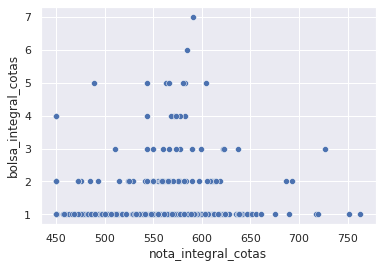

In [ ]:
sns.set()
sns.scatterplot(data=df, x=df['nota_integral_cotas'], y=df['bolsa_integral_cotas'])

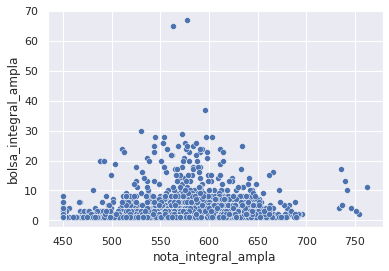

In [ ]:
sns.set()
sns.scatterplot(data=df, x=df['nota_integral_ampla'], y=df['bolsa_integral_ampla'])

# Por fim, iremos realizar os testes de normalidade, existem testes de normalidade númericos e testes de normalidade gráficos, como:

- Shapiro-Wilk (limite de 5000 amostras);

- Kolmogorov_Smirnov;

- Histograma;

- QQplot.

#### Histograma

In [ ]:
import plotly.express as px

grafico =  px.histogram (df,  x = "nota_integral_ampla", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400, height=400, title_text='Distribuição de notas (integral/ampla)') 
grafico.show()

In [ ]:
import plotly.express as px

grafico =  px.histogram (df,  x = "nota_integral_cotas", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400, height=400, title_text='Distribuição de notas (integral/cotas)') 
grafico.show()

#### Shapiro-Wilk (limite de 5000 amostras);





In [ ]:
import scipy.stats as stats

In [ ]:

stats.shapiro(df.nota_parcial_cotas)

ShapiroResult(statistic=nan, pvalue=1.0)

In [ ]:
stats.shapiro(df.nota_parcial_ampla)

ShapiroResult(statistic=nan, pvalue=1.0)

#### QQplot

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

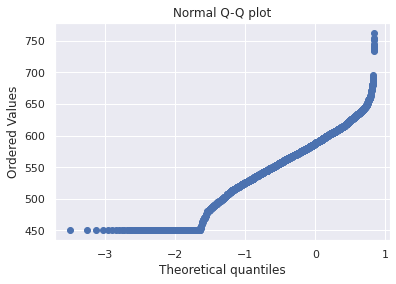

In [ ]:
stats.probplot(df['nota_integral_ampla'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

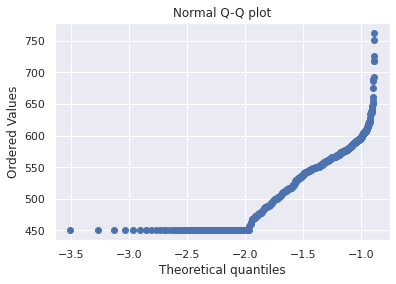

In [ ]:
stats.probplot(df['nota_integral_cotas'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

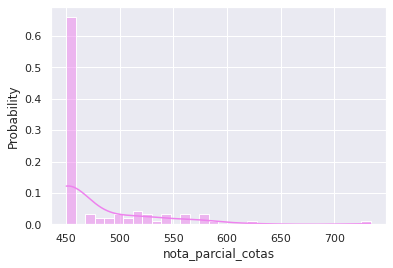

In [ ]:
sns.histplot(df, x='nota_parcial_cotas', bins=32, color="violet", kde=True, stat="probability");

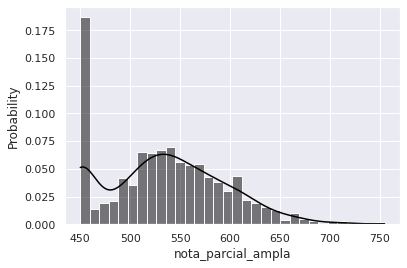

In [ ]:
sns.histplot(df, x='nota_parcial_ampla', bins=32, color="black", kde=True, stat="probability");

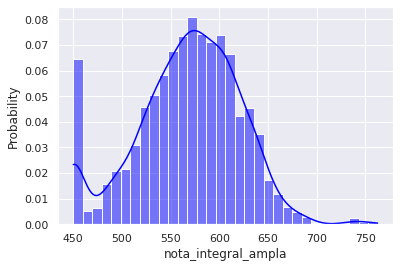

In [ ]:
sns.histplot(df, x='nota_integral_ampla', bins=32, color="blue", kde=True, stat="probability");

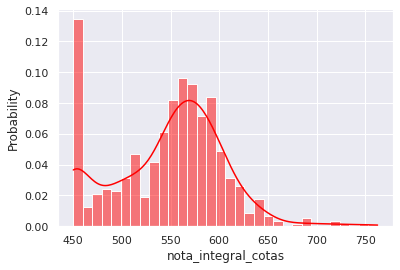

In [ ]:
sns.histplot(df, x='nota_integral_cotas', bins=32, color="red", kde=True, stat="probability");